<h1><center>Big Data Algorithms Techniques & Platforms</center></h1>
<h2>
<hr style=" border:none; height:3px;">
<center>Assignment 4 - MapReduce and Spark</center>
<hr style=" border:none; height:3px;">
</h2>

# Introduction


<p align="justify">
<font size="3">
In this exercise you is asked to use Spark for implementing an algorithm that applies computations on documents and dataframes.
</font>
</p>

<p align="justify">
<hr style=" border:none; height:2px;">
 <font  size="3" color='#91053d'>**Execute the following cell in order to initialize Spark**</font>
<hr style=" border:none; height:2px;">
</p>

In [1]:
!apt-get update
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://downloads.apache.org/spark/spark-3.3.1/spark-3.3.1-bin-hadoop2.tgz
!tar zxvf spark-3.3.1-bin-hadoop2.tgz
!pip install -q findspark
 
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.3.1-bin-hadoop2"


import findspark
findspark.init()
from pyspark import SparkConf, SparkContext
conf = SparkConf().setMaster("local")
sc = SparkContext(conf = conf)
print("initialization successful!")


#import of the SparkSession
from pyspark.sql import SparkSession


import findspark
findspark.init()

#import of the SparkSession
from pyspark.sql import SparkSession

#inizialization of the Spark Session
spark = SparkSession \
    .builder \
    .appName("Assignment_4") \
    .getOrCreate()

import numpy as np
import random as rn
import pandas as pd

seed_value=0
import os
os.environ['PYTHONHASHSEED']=str(seed_value)

import pandas as pa

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:2 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [102 kB]
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:13 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [83.3 kB]
Get:14 http://security.ubuntu.com

# Analysing documents


<p align="justify">
<font size="3">
We have already seen that MapReduce procedures are good in analyzing text-files.
    
The provided data comes from The Office serie and is available on kaggle:
    
https://www.kaggle.com/datasets/thedevastator/the-office-character-dialogues
    

    
The assignment is divided in 3 parts:
    
* Part 1 is focused on MapReduce;
    
* Part 2  is focuses on dataframes;

* Part 3 is on MongoDB (another file).

    </font>
    </p>
    
<p align="justify">
<hr style=" border:none; height:2px;">
 <font  size="3" color='#91053d'>Notice that if you see that your colab instance is not supporting all the documents you can work on a subset of them.</font>
<hr style=" border:none; height:2px;">
</p>

# Part 1 -  MapReduce
<p align="justify">
<font size="3">
In the provided folder you can find a folder called <code>the_office</code>. The folder contains set (<code>59582</code>) of documents/files containing  the dialogs (words and additional informations referring to the dialog). 
Specifically in each file:

- the first line is the episode ID;
- the second line is the name of the character that is speaking;
- from the second line is the content of one dialog.
    </font>
    </p>



## Exercise 1 - (2 points) - Dialog number for episode

<p align="justify">
<font size="3">
Using just the informations provided in the files provide a map-reduce procedure that counts how many dialogs are present for each episode.

 </font>
</p>

<p align="justify">
<hr style=" border:none; height:2px;">
 <font  size="3" color='#91053d'>Notice that  you can reuse any code that was made available for the previous labs/assignments or that you already developed in these contexts.</font>
<hr style=" border:none; height:2px;">
</p>

In [ ]:
!unzip the_office

Streaming output truncated to the last 5000 lines.
  inflating: the_office/29527.txt    
  inflating: the_office/31368.txt    
  inflating: the_office/40591.txt    
  inflating: the_office/30076.txt    
  inflating: the_office/28639.txt    
  inflating: the_office/37719.txt    
  inflating: the_office/20265.txt    
  inflating: the_office/52195.txt    
  inflating: the_office/34210.txt    
  inflating: the_office/6487.txt     
  inflating: the_office/42386.txt    
  inflating: the_office/7941.txt     
  inflating: the_office/24003.txt    
  inflating: the_office/43098.txt    
  inflating: the_office/32661.txt    
  inflating: the_office/22472.txt    
  inflating: the_office/13877.txt    
  inflating: the_office/55822.txt    
  inflating: the_office/7799.txt     
  inflating: the_office/22314.txt    
  inflating: the_office/44091.txt    
  inflating: the_office/35668.txt    
  inflating: the_office/32107.txt    
  inflating: the_office/54282.txt    
  inflating: the_office/33219.txt    

In [ ]:
# In load_file, I am appending all the 59582 files together in one list, where each index is a list representing one file with Episode ID,
# Character Name and the dialog

def load_file(filename):
  office = []
  off = sc.textFile(filename)
  for x in off.collect():
    office.append(x)
  return office

off = []
for i in range(1,59582): #59582
  off.append(load_file('the_office/'+str(i)+'.txt'))

# I wanted to use sc.wholeFiles but it takes too much time to run one single map-reduce compared with this method where the loading takes
# a huge time but map reduce takes less than 5 sec

In [ ]:
# I verified that all the files have only 3 lines except these 2 episodes (4 lines)
# ['09x17 - The Farm', 'Jeb', 'Jeb: Hi, Fannie.\u2028', 'Fannie: Hey.']
# ['09x26 - Retrospective', '', '♪ If you need me let me know ♪', "♪ gonna be around if you got no place to go if you're feeling down ♪"]
# I ran this code
for x in off:
  if len(x) != 3:
    print(x)

['09x17 - The Farm', 'Jeb', 'Jeb: Hi, Fannie.\u2028', 'Fannie: Hey.']
['09x26 - Retrospective', '', '♪ If you need me let me know ♪', "♪ gonna be around if you got no place to go if you're feeling down ♪"]


In [ ]:
# For the sake of the exercise, because it is only 2 of 59582 files, the analysis won't change this much if we keep them or not,
# so I will drop them from the list to have accurate results by filtering length that is not equal to 3

In [ ]:
# When I was looking at the structure of each file, I noticed that there are Deleted scenes that are counted as episodes as well as Webisodes, 
# so for our analysis to be as accurate as possible, I will drop them from the RDD 'offices'
# Furthermore, 09x26, 05x29 and 05x30 are not official episodes from the series (I checked each episode on Wikipedia one by one) so they
# should be removed as well 

In [ ]:
offices = sc.parallelize(off).filter(lambda x: len(x) == 3).filter(lambda x: "Deleted Scenes" not in x[0]).filter(lambda x: "Webisodes" not in x[0])\
.filter(lambda x: "09x26" not in x[0]).filter(lambda x: "05x29" not in x[0]).filter(lambda x: "05x30" not in x[0])

In [ ]:
# Method 1: As assignment 2, apply a series of spark operations function representing each step in the map-reduce approach

# Before doing anything,  I checked all the files with empty character fields and I noticed that all these files have text without dialog,
# meaning only expressing an action and not a dialog (ex: Andy sat down) in the last line of each file (the dialog line).
# Because we want to evaluate how many dialogs are present for each episode, we need to remove these files using a filter.
# In this map-reduce procedure, first for the map step, I am creating a tuple using .map where the first index is the file episode ID and 
# the second index is the number 1 representing one dialog. Then, the shuffle and reduce are done using reduceByKey where this function 
# regroups all the number 1s of one key (file episode ID) into one list and counts all the elements of the list

number_dialogs = offices.filter(lambda x: len(x[1]) != 0)\
                        .map(lambda x: (x[0],1))\
                        .reduceByKey(lambda x, y: x+y)

print("How many dialogs are present for each episode?")
number_dialogs.collect()

How many dialogs are present for each episode?


[('01x01 - Pilot', 224),
 ('01x02 - Diversity Day', 200),
 ('01x03 - Health Care', 239),
 ('01x04 - The Alliance', 241),
 ('01x05 - Basketball', 227),
 ('01x06 - Hot Girl', 342),
 ('02x01 - The Dundies', 252),
 ('02x02 - Sexual Harassment', 278),
 ('02x03 - Office Olympics', 279),
 ('02x04 - The Fire', 310),
 ('02x05 - Halloween', 262),
 ('02x06 - The Fight', 265),
 ('02x07 - The Client', 248),
 ('02x08 - Performance Review', 265),
 ('02x09 - E-Mail Surveillance', 270),
 ('02x10 - Christmas Party', 278),
 ('02x11 - Booze Cruise', 219),
 ('02x12 - The Injury', 352),
 ('02x13 - The Secret', 258),
 ('02x14 - The Carpet', 253),
 ('02x15 - Boys & Girls', 276),
 ("02x16 - Valentine's Day", 195),
 ("02x17 - Dwight's Speech", 201),
 ('02x18 - Take Your Daughter to Work Day', 262),
 ("02x19 - Michael's Birthday", 245),
 ('02x20 - Drug Testing', 211),
 ('02x21 - Conflict Resolution', 251),
 ('02x22 - Casino Night', 356),
 ('03x01 - Gay Witch Hunt', 139),
 ('03x02 - The Convention', 290),
 ('03x0

In [ ]:
# Method 2: As assignment 1, create a function representing each step in the map-reduce approach

from collections import defaultdict

# This function generates a tuple containing as the first index the file episode ID and as the second index the number 1 (referencing one episode)
def map_e_roles(res):
  mapper = []
  for row in res.collect():
    mapper.append((row[0],1))
  return mapper

# This function creates a dictionary where the key is the file episode ID and the value is a list of the occurrences 
# (the number 1 in this case) of each key
def shuffle_e_roles(mapper):
  d = defaultdict(list)
  for k,v in mapper:
    d[k].append(v)
  return d

# This function just sums up the list of the values associated with each key: I used len instead of sum because the list is of 1s only
# so the sum of 1s in the list is equal to the length of the list
# and if we do sum the complexity will be O(n) compared to O(1) when we use length 
def reduce_e_roles(d):
  result = []
  for key in d:
    num = len(d[key])
    result.append((key,num))
  return result

result = reduce_e_roles(shuffle_e_roles(map_e_roles(offices.filter(lambda x: len(x[1]) != 0)))) # using filter remove files with no character 
                                                                                                # field
print("How many dialogs are present for each episode?")
print(result)

How many dialogs are present for each episode?
[('01x01 - Pilot', 224), ('01x02 - Diversity Day', 200), ('01x03 - Health Care', 239), ('01x04 - The Alliance', 241), ('01x05 - Basketball', 227), ('01x06 - Hot Girl', 342), ('02x01 - The Dundies', 252), ('02x02 - Sexual Harassment', 278), ('02x03 - Office Olympics', 279), ('02x04 - The Fire', 310), ('02x05 - Halloween', 262), ('02x06 - The Fight', 265), ('02x07 - The Client', 248), ('02x08 - Performance Review', 265), ('02x09 - E-Mail Surveillance', 270), ('02x10 - Christmas Party', 278), ('02x11 - Booze Cruise', 219), ('02x12 - The Injury', 352), ('02x13 - The Secret', 258), ('02x14 - The Carpet', 253), ('02x15 - Boys & Girls', 276), ("02x16 - Valentine's Day", 195), ("02x17 - Dwight's Speech", 201), ('02x18 - Take Your Daughter to Work Day', 262), ("02x19 - Michael's Birthday", 245), ('02x20 - Drug Testing', 211), ('02x21 - Conflict Resolution', 251), ('02x22 - Casino Night', 356), ('03x01 - Gay Witch Hunt', 139), ('03x02 - The Conventi

## Exercise 2 - (3 total points)
The most common words



### 2.1 - (1 point) - Common words by serie
Provide a Spark MapReduce procedure that returns the 10 most common words in the whole set of dialogs.




In [8]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# I am creating a list of stopwords in english
english_stopwords = stopwords.words('english')

# Regular expression for removing all non-letter characters in the file.
regex = re.compile('[^a-zA-Z]')

def remove_brackets(line): # In some dialogs, there are text between brackets that describe an action (ex: [on the phone]), 
                           # so I have to remove them
  return re.sub("[\(\[].*?[\)\]]", '', line)

def remove_non_letters(word): # removes all non-letter characters in the file
    return regex.sub('', word)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Before doing anything,  I checked all the files with empty character fields and I noticed that all these files have text without dialog,
# meaning only expressing an action and not a dialog (ex: Andy sat down) in the last line of each file (the dialog line).
# Because we want to evaluate how many dialogs are present for each episode, we need to remove these files using a filter.
# First, I use map to extract all the dialogs from each file, I lowercase each word, then I only want the dialog not the character's name, 
# so I have to slice the dialog to only take the part without the name by searching for : in the string. After this, I remove the text 
# between brackets that describe an action (ex: [on the phone]). Then, I split each dialog into a list of words and I regroup them in one 
# list using flatMap, and I remove non-letter words such as . , ""... The result is then indexed into a tuple, along with the number
# 1 representing one occurence of this word in a file. Furthermore, I remove stopwords and empty words. Finally, the shuffle and reduce are done 
# using reduceByKey where this function regroups all the number 1s of one key (file episode ID) into one list and counts all the elements 
# of the list. The result is sorted by descending order of the count of each word.

common_words_serie = offices.filter(lambda x: len(x[1]) != 0)\
                            .map(lambda x: x[2].lower())\
                            .map(lambda x: x[x.find(':')+2:])\
                            .map(lambda line: remove_brackets(line))\
                            .flatMap(lambda x : x.split(" "))\
                            .map(lambda word: (remove_non_letters(word), 1))\
                            .filter(lambda word: word[0] not in english_stopwords)\
                            .filter(lambda empty: len(empty[0]) > 0)\
                            .reduceByKey(lambda x, y: x+y)\
                            .sortBy(lambda f: f[1], ascending=False)

print("The 10 most common words in the whole set of dialogs are:")
common_words_serie.take(10)

The 10 most common words in the whole set of dialogs are:


[('im', 4309),
 ('know', 3907),
 ('oh', 3856),
 ('dont', 3617),
 ('like', 2951),
 ('yeah', 2772),
 ('okay', 2528),
 ('well', 2487),
 ('right', 2379),
 ('get', 2313)]

### 2.2 - (1 point) - Common words by episode
Provide a Spark MapReduce procedure that returns the 10 most common words for each episode.




In [ ]:
def link(mapping):
  sep = []
  for x in mapping.collect():
    for i in x[1]:
      if type(x[0]) == str:
        sep.append((x[0], i))
      else:
        for j in x[0]:
          sep.append((j, i))
  return sep

def top(mapping):
  top = []
  temp = '' # the temp is used to save the previous episode's name
  count = 1
  for x in mapping.collect():
    if (x[0][0] == temp or len(temp) == 0) and count != 10: # when counter is equal to 10, it doesn't enter any of the if structures
                                                            # this condition len(temp) == 0 is only for the first iteration where temp = '' 
                                                            # this condition x[0][0] == temp is when episode name is the same as the previous
                                                            # line
      top.append(x)
      count = count + 1

    if x[0][0] != temp: # when episode name changes
      count = 1
      top.append(x)
    temp = x[0][0]
  return top

# Before doing anything,  I checked all the files with empty character fields and I noticed that all these files have text without dialog,
# meaning only expressing an action and not a dialog (ex: Andy sat down) in the last line of each file (the dialog line).
# Because we want to evaluate how many dialogs are present for each episode, we need to remove these files using a filter.
# First, I use map to extract all the dialogs from each file, I lowercase each word, then I create a tuple where the first index is the 
# episode's name and the second index is the dialog, so I have to slice the dialog to only take the part without the character's name by 
# searching for : in the string. After this, I remove the text between brackets that describe an action (ex: [on the phone]). 
# Then, I split each dialog into a list of words.

mapping = offices.filter(lambda x: len(x[1]) != 0)\
                 .map(lambda x: (x[0], x[2].lower()))\
                 .map(lambda x: (x[0], x[1][x[1].find(':')+2:]))\
                 .map(lambda line: (line[0], remove_brackets(line[1])))\
                 .map(lambda x : (x[0], x[1].split(" ")))

# I created a function to map each episode's name with each word individually of each list. I created a type condition because when I split
# the character's name in part 2.3 (because sometimes we have several character's names in one line of dialog), we need to map each character's
# name individually with each word individually of each list of dialog.

seperator = sc.parallelize(link(mapping))

# I create a tuple using .map where the first index is the tuple generated by the function above, but in addition I remove non-letter words 
# such as . , ""... from the word, the episode is intact, the second index is the number 1 representing one occurence of this word in a file. 
# Furthermore, I remove stopwords and empty words. Finally, the shuffle and reduce are done using reduceByKey where this function regroups all 
# the number 1s of one key (file episode ID) into one list and counts all the elements of the list. The result is sorted by descending order 
# of the count of each word, taking into consideration alphabetical order

common_words_ep = seperator.map(lambda word: ((word[0], remove_non_letters(word[1])), 1))\
                            .filter(lambda word: word[0][1] not in english_stopwords)\
                            .filter(lambda empty: len(empty[0][1]) > 0)\
                            .reduceByKey(lambda x, y: x+y)\
                            .sortBy(lambda f: (f[0][0], f[1]), ascending=False)

# I created a function to take only the first 10 results of each character, and then I sort by alphabetical order
common_words_episode = sc.parallelize(top(common_words_ep)).sortBy(lambda f: f[0][0], ascending=True)

print("The 10 most common words for each episode are:")
common_words_episode.collect()

The 10 most common words for each episode are:


[(('01x01 - Pilot', 'yeah'), 28),
 (('01x01 - Pilot', 'im'), 23),
 (('01x01 - Pilot', 'ok'), 21),
 (('01x01 - Pilot', 'know'), 20),
 (('01x01 - Pilot', 'right'), 18),
 (('01x01 - Pilot', 'pam'), 17),
 (('01x01 - Pilot', 'going'), 17),
 (('01x01 - Pilot', 'dont'), 16),
 (('01x01 - Pilot', 'thats'), 14),
 (('01x01 - Pilot', 'think'), 14),
 (('01x02 - Diversity Day', 'ok'), 34),
 (('01x02 - Diversity Day', 'im'), 27),
 (('01x02 - Diversity Day', 'oh'), 18),
 (('01x02 - Diversity Day', 'dont'), 18),
 (('01x02 - Diversity Day', 'going'), 17),
 (('01x02 - Diversity Day', 'know'), 17),
 (('01x02 - Diversity Day', 'right'), 17),
 (('01x02 - Diversity Day', 'well'), 17),
 (('01x02 - Diversity Day', 'lets'), 16),
 (('01x02 - Diversity Day', 'thank'), 15),
 (('01x03 - Health Care', 'im'), 26),
 (('01x03 - Health Care', 'know'), 24),
 (('01x03 - Health Care', 'ok'), 24),
 (('01x03 - Health Care', 'oh'), 23),
 (('01x03 - Health Care', 'dont'), 21),
 (('01x03 - Health Care', 'plan'), 17),
 (('01x03 

### 2.3 - (1 point) - Common words by character
Provide a Spark MapReduce procedure that returns the 10 most common words for each character.



In [ ]:
# Before doing anything,  I checked all the files with empty character fields and I noticed that all these files have text without dialog,
# meaning only expressing an action and not a dialog (ex: Andy sat down) in the last line of each file (the dialog line).
# Because we want to evaluate how many dialogs are present for each episode, we need to remove these files using a filter.
# First, I use map to extract all the dialogs from each file, I lowercase each word, then I create a tuple where the first index is the 
# character's name and the second index is the dialog, so I have to slice the dialog to only take the part with the character's name by 
# searching for : in the string, also I have to slice the dialog to only take the part without the name (same). After this, I remove the text 
# between brackets that describe an action (ex: [on the phone]) from both character's name and dialog. 
# Then, I split each dialog into a list of words and I split character's name by looking for &, and, comma, / because we have several 
# character's names in one line of dialog

mapping = offices.filter(lambda x: len(x[1]) != 0)\
                 .map(lambda x: x[2].lower())\
                 .map(lambda x: (x[:x.find(':')], x[x.find(':')+2:]))\
                 .map(lambda line: (remove_brackets(line[0]), remove_brackets(line[1])))\
                 .map(lambda x : (re.split("& |and |, |/", x[0]), x[1].split(" ")))

# I created a function to map each character's name with each word individually of each list. I created a type condition because when I split
# the character's name in part 2.3 (because sometimes we have several character's names in one line of dialog), we need to map each character's
# name individually with each word individually of each list of dialog.

seperator = sc.parallelize(link(mapping))

# I create a tuple using .map where the first index is the tuple generated by the function above, but in addition I remove non-letter words 
# such as . , ""... from the word,  same for the character (but I keep the spaces since sometimes a character has a last name), the second 
# index is the number 1 representing one occurence of this word in a file. Furthermore, I remove stopwords and empty words, in addition to empty
# characters. Finally, the shuffle and reduce are done using reduceByKey where this function regroups all 
# the number 1s of one key (file episode ID) into one list and counts all the elements of the list. The result is sorted by descending order 
# of the count of each word, taking into consideration alphabetical order

common_words_char = seperator.map(lambda word: ((re.sub('[^a-zA-Z ]',"", word[0].capitalize()).strip(), remove_non_letters(word[1])), 1))\
                              .filter(lambda word: word[0][1] not in english_stopwords)\
                              .filter(lambda empty: len(empty[0][0]) > 0)\
                              .filter(lambda empty: len(empty[0][1]) > 0)\
                              .reduceByKey(lambda x, y: x+y)\
                              .sortBy(lambda f: (f[0][0], f[1]), ascending=False)

# I created a function to take only the first 10 results of each character, and then I sort by alphabetical order
common_words_character = sc.parallelize(top(common_words_char)).sortBy(lambda f: f[0][0], ascending=True)

print("The 10 most common words for each character are:")
common_words_character.collect()

The 10 most common words for each character are:


[(('Aaron rodgers', 'youre'), 3),
 (('Aaron rodgers', 'man'), 2),
 (('Aaron rodgers', 'lot'), 2),
 (('Aaron rodgers', 'good'), 2),
 (('Aaron rodgers', 'middleaged'), 1),
 (('Aaron rodgers', 'makeup'), 1),
 (('Aaron rodgers', 'flag'), 1),
 (('Aaron rodgers', 'play'), 1),
 (('Aaron rodgers', 'look'), 1),
 (('Aaron rodgers', 'terrible'), 1),
 (('Abby', 'yeah'), 2),
 (('Abby', 'thanks'), 1),
 (('Abby', 'mixedup'), 1),
 (('Abby', 'files'), 1),
 (('Abby', 'mrs'), 1),
 (('Abby', 'basil'), 1),
 (('Abby', 'e'), 1),
 (('Abby', 'frankweiler'), 1),
 (('Abby', 'ive'), 1),
 (('Abby', 'read'), 1),
 (('Abe', 'erin'), 1),
 (('Abe', 'respect'), 1),
 (('Abe', 'privacy'), 1),
 (('Abe', 'follow'), 1),
 (('Abe', 'everytime'), 1),
 (('Abe', 'go'), 1),
 (('Abe', 'thats'), 1),
 (('Abe', 'takes'), 1),
 (('Actor', 'hey'), 2),
 (('Actor', 'rach'), 1),
 (('Actor', 'settle'), 1),
 (('Actor', 'bet'), 1),
 (('Actor', 'natural'), 1),
 (('Actor', 'redhead'), 1),
 (('Actor', 'im'), 1),
 (('Actor', 'even'), 1),
 (('Actor

# Exercise 3 (3 total points)








## 3.1 - (1 point) - Character/Dialog 
Provide a Spark MapReduce procedure that returns the character that has the most number of dialogs (with the number of dialogs).

In [ ]:
# Before doing anything,  I checked all the files with empty character fields and I noticed that all these files have text without dialog,
# meaning only expressing an action and not a dialog (ex: Andy sat down) in the last line of each file (the dialog line).
# Because we want to evaluate how many dialogs are present for each episode, we need to remove these files using a filter.
# First, I use map to extract all the dialogs from each file, I lowercase each word, then I only want the character's name from the dialog,
# so I have to slice the dialog to only take the part with the name by searching for : in the string. After this, I remove the text 
# between brackets that describe an action (ex: [on the phone]). Then, I split character's name by looking for &, and, comma, / because 
# we have several character's names in one line of dialog and I regroup them in one list using flatMap, and I remove non-letter words 
# such as . , ""... The result is then indexed into a tuple, along with the number
# 1 representing one occurence of this character in a file. Furthermore, I remove empty words. Finally, the shuffle and reduce are done 
# using reduceByKey where this function regroups all the number 1s of one key (file episode ID) into one list and counts all the elements 
# of the list. The result is sorted by descending order of the count of each character.

dialogs_character = offices.filter(lambda x: len(x[1]) != 0)\
                           .filter(lambda x: len(x[1]) != 0)\
                           .map(lambda x: x[2].lower())\
                           .map(lambda x: remove_brackets(x[:x.find(':')]))\
                           .flatMap(lambda x : re.split("& |and |, |/", x))\
                           .map(lambda x: (re.sub('[^a-zA-Z ]',"", x.capitalize()).strip(),1))\
                           .filter(lambda empty: len(empty[0]) > 0)\
                           .reduceByKey(lambda x, y: x+y)\
                           .sortBy(lambda f: f[1], ascending=False)


print("The character that has the most number of dialogs is:")
dialogs_character.take(1)

The character that has the most number of dialogs is:


[('Michael', 10679)]

## 3.2 - (1 point) - Episode/Dialogs
Provide a Spark MapReduce procedure that returns the episode that has the most part of dialogs.





In [ ]:
# Before doing anything,  I checked all the files with empty character fields and I noticed that all these files have text without dialog,
# meaning only expressing an action and not a dialog (ex: Andy sat down) in the last line of each file (the dialog line).
# Because we want to evaluate how many dialogs are present for each episode, we need to remove these files using a filter.
# First, I use map to extract all the episode's names from each file which is then indexed into a tuple, along with the number
# 1 representing one occurence of this episode in a file. Finally, the shuffle and reduce are done 
# using reduceByKey where this function regroups all the number 1s of one key (file episode ID) into one list and counts all the elements 
# of the list. The result is sorted by descending order of the count of each episode. 

dialogs_episode = offices.filter(lambda x: len(x[1]) != 0)\
                         .map(lambda x: (x[0], 1))\
                         .reduceByKey(lambda x, y: x+y)\
                         .sortBy(lambda f: f[1], ascending=False)

print("The episode that has the most number of dialogs is:")
dialogs_episode.take(1)

The episode that has the most number of dialogs is:


[('06x17/18 - The Delivery (Parts 1&2)', 597)]

## 3.3 - (1 point) - Words/Episode
Provide a Spark MapReduce procedure that returns the 10 episodes having the most number of words.

In [ ]:
# First, in the map-reduce procedure, I will create a tuple where the first index is the episode's name and the second one is the dialog 
# lowercased. Then, I split the dialog into a list of words and I calculate the length of each list. Finally, the shuffle and reduce are done 
# using reduceByKey where this function regroups all the number 1s of one key (file episode ID) into one list and counts all the elements 
# of the list. The result is sorted by descending order of the count of each episode.

words_episodes = offices.map(lambda x: (x[0], x[2].lower()))\
                        .map(lambda x : (x[0], x[1].split(" ")))\
                        .map(lambda x : (x[0], len(x[1])))\
                        .reduceByKey(lambda x, y: x+y)\
                        .sortBy(lambda f: f[1], ascending=False)

# We don't have to remove stop words since we want to know the total number of words not the most common words
# Here, we don't have to remove the brackets of the text since we want to know the most number of words in the episode and these are
# counted as words that are part of the episode
# Additionally, I won't remove Micheal: ... from the dialog since we want to know the most number of words in the episode and these are
# counted as words that are part of the episode
# Finally since we want to know the total number of words not the most common words, I don't need to remove the files with 
# empty character fields 

print("The 10 episodes that have the most number of words are:")
words_episodes.take(10)

The 10 episodes that have the most number of words are:


[('07x25/26 - Search Committee (Parts 1&2)', 7679),
 ('07x11/12 - Classy Christmas (Parts 1&2)', 6989),
 ('06x17/18 - The Delivery (Parts 1&2)', 6975),
 ('09x24/25 - Finale', 6908),
 ('06x04/05 - Niagara (Parts 1&2)', 6611),
 ('04x03/04 - Dunder Mifflin Infinity (Parts 1&2)', 6566),
 ('05x01/02 - Weight Loss (Parts 1&2)', 6291),
 ('04x01/02 - Fun Run (Parts 1&2)', 6173),
 ('04x05/06 - Launch Party (Parts 1&2)', 6130),
 ('04x18/19 - Goodbye, Toby (Parts 1&2)', 6075)]


<p align="justify">
<hr style=" border:none; height:2px;">
 <font  size="3" color='#91053d'>**DataFrames**</font>
<hr style=" border:none; height:2px;">
</p>

# Part 2 - Dataframes

In this part you can use Pandas Dataframes or  Spark Dataframes.  I suggest to use a Spark Dataframe
end exploit the Pandas functionalities as we have seen in the 2nd assignment. Download the 3 available datasets at the link:

https://www.kaggle.com/datasets/thedevastator/the-office-character-dialogues

You can find 3 .cvs files: 

* the_office_series.csv

* TheOffice_data.csv

* TheOffice_transcripts

We will focus on the file2:

* the_office_series.csv

* TheOffice_transcripts.csv



# Import  data.
<p align="justify">
<font size="3">

The <code> the_office_series </code> file contains 11 fields. Not all the fields are of interest for the analysis. 

* Season	
* EpisodeTitle	
* About	
* Ratings	
* Votes	
* Viewership	
* Duration	
* Date	
* GuestStars	
* Director	
* Writers
    
</font>
</p>




#  Exercise 4 - (1 point) - Director list

<p align="justify">
<font size="3">
Provide a program that finds the distinct list of the directors.

</font>
</p>






In [2]:
from pyspark.sql.functions import col, isnan, when, count, explode, split, locate, lower, regexp_replace, udf, rtrim, ltrim, length, initcap

In [ ]:
# escape option: Sets a single character used for escaping quotes inside an already quoted value
# delimiter option: Sets a separator for each line which is ,
# multiline option: Parse one record, which may span multiple lines, per file

data = spark.read.option("inferSchema", "true").option("escape",'"').option("delimiter",",").option("multiline",True).csv("the_office_series.csv", header=True)

# Director has no NAN values (as shown below) but director has a column value 'see full summary', so must remove them since it's not a director
# name, I have also to use distinct since I want the distinct list of the directors
data.select(col('Director')).distinct().where("Director!='See full summary'").show(100)

print('The number of distinct directors is: ', end ='')
data.select(col('Director')).distinct().where("Director!='See full summary'").count()

+--------------------+
|            Director|
+--------------------+
|        Rainn Wilson|
|          John Scott|
|          Eric Appel|
|        Greg Daniels|
|       Dennie Gordon|
|          Ken Kwapis|
|      Bryan Cranston|
|         Troy Miller|
|     Alex Hardcastle|
|      Amy Heckerling|
|        Dean Holland|
|         Jon Favreau|
|           Paul Feig|
|            Ed Helms|
|        Asaad Kelada|
|       Lee Eisenberg|
|       Julian Farino|
|    Paul Lieberstein|
|    Victor Nelli Jr.|
|           Marc Webb|
|      Charlie Grandy|
|Kelly Cantley-Kas...|
|           Matt Sohn|
|          B.J. Novak|
|          Craig Zisk|
|      Rodman Flender|
|         J.J. Abrams|
|        Roger Nygard|
|        Bryan Gordon|
|        Steve Carell|
|   Brian Baumgartner|
|    Stephen Merchant|
|        Mindy Kaling|
|     Gene Stupnitsky|
|        Tucker Gates|
|        Jesse Peretz|
|        David Rogers|
|       Jason Reitman|
|        Harold Ramis|
|    Jennifer Celotta|
|          

53

#  Exercise 5 - (2 points) - Director/Episodes

<p align="justify">
<font size="3">
Provide the code that provides how many episodes each director directed.

</font>
</p>




In [ ]:
# I want to show how many null values I have in each column
print('The number of null values of each column is: ')
data.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in data.columns]).show()

The number of null values of each column is: 
+---+------+------------+-----+-------+-----+----------+--------+----+----------+--------+-------+
|_c0|Season|EpisodeTitle|About|Ratings|Votes|Viewership|Duration|Date|GuestStars|Director|Writers|
+---+------+------------+-----+-------+-----+----------+--------+----+----------+--------+-------+
|  0|     0|           0|    0|      0|    0|         0|       0|   0|       159|       0|      0|
+---+------+------------+-----+-------+-----+----------+--------+----+----------+--------+-------+



In [ ]:
# EpisodeTitle and Director have no NAN values but director has a column value 'see full summary', so must remove them since it's not a director
# name, I want distinct combinations of Directors and Episode ID, I group by Director, I use function called count to count the number of episodes
# that each director directed and I order by the count in descending order

print('The number of episodes each director directed is: ')
data.select(col('Director'), col('EpisodeTitle')).distinct().where("Director!='See full summary'").groupBy('Director').count().orderBy(col('count').desc()).show(55, truncate = False)

The number of episodes each director directed is: 
+---------------------+-----+
|Director             |count|
+---------------------+-----+
|Randall Einhorn      |15   |
|Paul Feig            |15   |
|Greg Daniels         |13   |
|Ken Kwapis           |13   |
|Jeffrey Blitz        |11   |
|David Rogers         |9    |
|Ken Whittingham      |8    |
|Matt Sohn            |8    |
|Charles McDougall    |8    |
|Paul Lieberstein     |7    |
|B.J. Novak           |5    |
|Harold Ramis         |4    |
|Brent Forrester      |4    |
|Tucker Gates         |4    |
|Steve Carell         |3    |
|Jennifer Celotta     |3    |
|John Krasinski       |3    |
|Troy Miller          |3    |
|Rainn Wilson         |3    |
|Mindy Kaling         |2    |
|Julian Farino        |2    |
|Joss Whedon          |2    |
|Claire Scanlon       |2    |
|Dean Holland         |2    |
|Ed Helms             |2    |
|Bryan Gordon         |2    |
|Seth Gordon          |2    |
|John Scott           |1    |
|Alex Hardcastle   

#  Exercise 6 - (2 points) Writer/Episode

<p align="justify">
<font size="3">
Provide the code that using dataframe return the number of episodes each writer contributed to.
</font>
</p>

In [ ]:
# EpisodeTitle and Writer have no NAN values so no need for a where clause
# First, I want to split all the Writers values when I find | or and because sometimes there are several writers for one episode, so I need to
# split them to get the exact number, then I use left trim and right trim to remove the spaces before and after the full name of each writer.
# I group by Writer, I use function called count to count the number of episodes that each writer contributed to and I order by the count 
# in descending order

print('The number of episodes each writer contributed to is: ')
data.select(col('EpisodeTitle'), explode(split(col('Writers'),'\\|')).alias('Writers')).select(explode(split(col('Writers'),' and ')).alias('Writers')).withColumn('Writers', rtrim(ltrim(col('Writers')))).groupBy('Writers').count().orderBy(col('count').desc()).show(200)

The number of episodes each writer contributed to is: 
+--------------------+-----+
|             Writers|count|
+--------------------+-----+
|        Mindy Kaling|   22|
|    Paul Lieberstein|   16|
|       Lee Eisenberg|   15|
|     Gene Stupnitsky|   15|
|         B. J. Novak|   15|
|        Greg Daniels|   13|
|    Jennifer Celotta|   11|
|     Brent Forrester|   11|
|      Justin Spitzer|   11|
|       Michael Schur|   10|
|      Charlie Grandy|    7|
|  Warren Lieberstein|    7|
|    Halsted Sullivan|    7|
|         Daniel Chun|    7|
|         Aaron Shure|    6|
|      Owen Ellickson|    4|
|       Carrie Kemper|    4|
|      Robert Padnick|    4|
|          Steve Hely|    3|
|   Allison Silverman|    3|
|           Jon Vitti|    2|
|         Dan Greaney|    2|
|Niki Schwartz-Wright|    2|
|       Graham Wagner|    2|
|        Lester Lewis|    2|
|            Ryan Koh|    2|
|    Stephen Merchant|    2|
|     Amelie Gillette|    2|
|  Anthony Q. Farrell|    2|
|         Gabe Mi

# Import  data.
<p align="justify">
<font size="3">

The <code> TheOffice_transcripts </code> file contains 3 columns.  

* Field	: contains the dialog
* Field1	: contains the name of the speaking character
* Text : contains the Episode ID
    
</font>
</p>




#  Exercise 7 - (2 points) Dialog number/Episode

<p align="justify">
<font size="3">
Provide the code that gives the number of dialogs for each episode.
</font>
</p>

In [4]:
# escape option: Sets a single character used for escaping quotes inside an already quoted value
# delimiter option: Sets a separator for each line which is ,
# I changed all the columns name to something more meaningful, for example Text by EpisodeID
# When I was looking at the structure of the csv file, I noticed that there are Deleted scenes that are counted as episodes as well as Webisodes, 
# so for our analysis to be as accurate as possible, I will drop them from the dataframe
# Furthermore, 09x26, 05x29 and 05x30 are not official episodes from the series (I checked each episode on Wikipedia one by one) so they
# should be removed as well

data = spark.read.option("inferSchema", "true").option("escape",'"').option("delimiter",";").csv("TheOffice_transcripts.csv", header=True)\
            .withColumnRenamed("Text","EpisodeID").withColumnRenamed("Field","Dialog").withColumnRenamed("Field1","Character")\
            .where("EpisodeID not like '%Deleted Scenes%' and EpisodeID not like '%Webisodes%' and EpisodeID not like '09x26%' and EpisodeID not like '05x29%' and EpisodeID not like '05x30%'")\

# I want to show how many null values I have in each column
print('The number of null values of each column is: ')
data.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in data.columns]).show()

The number of null values of each column is: 
+------+---------+---------+
|Dialog|Character|EpisodeID|
+------+---------+---------+
|     0|      220|        0|
+------+---------+---------+



In [ ]:
# I want to display only from the dataframe EpsiodeID and Dialog columns where the length of column Character is not equal to 0 since
# I checked all the rows with empty character fields and I noticed that all these files have text without dialog,
# meaning only expressing an action and not a dialog (ex: Andy sat down) in the last line of each file (the dialog line).
# Because we want to evaluate how many dialogs are present for each episode, we need to remove these files using a where clause.
# I group by EpisodeID and I use function called count to count the number of Dialogs that each episode has and I order by the count 
# in descending order

print('The number of dialogs for each episode is: ')
data.select(col('EpisodeID'), col('Dialog')).where(length(col('Character')) != 0).groupBy('EpisodeID').count().orderBy(col('EpisodeID')).show()

The number of dialogs for each episode is: 
+--------------------+-----+
|           EpisodeID|count|
+--------------------+-----+
|       01x01 - Pilot|  224|
|01x02 - Diversity...|  200|
| 01x03 - Health Care|  239|
|01x04 - The Alliance|  241|
|  01x05 - Basketball|  227|
|    01x06 - Hot Girl|  342|
| 02x01 - The Dundies|  252|
|02x02 - Sexual Ha...|  278|
|02x03 - Office Ol...|  279|
|    02x04 - The Fire|  310|
|   02x05 - Halloween|  262|
|   02x06 - The Fight|  265|
|  02x07 - The Client|  248|
|02x08 - Performan...|  265|
|02x09 - E-Mail Su...|  270|
|02x10 - Christmas...|  278|
|02x11 - Booze Cruise|  219|
|  02x12 - The Injury|  352|
|  02x13 - The Secret|  258|
|  02x14 - The Carpet|  253|
+--------------------+-----+
only showing top 20 rows



#  Exercise 8 - (2 points) 

<p align="justify">
<font size="3">
Provide the code that returns the character that has the most number of dialogs (with the number of dialogs).



</font>
</p>

In [15]:
remove_stopwords = udf(lambda word: word in english_stopwords) # function to remove stopwords
empty = udf(lambda word: len(word) == 0) # function to remove empty words

In [6]:
# Since Character has too many null values and Dialog has no null values in addition to including the name of the character in the beginning
# of each dialog, I will not use the Character column but instead use the Dialog column to extract the name of the character 
# I checked all the rows with empty character fields and I noticed that all these files have text without dialog,
# meaning only expressing an action and not a dialog (ex: Andy sat down) in the last line of each file (the dialog line).
# Because we want to evaluate how many dialogs are present for each episode, we need to remove these files using a where clause.
# I create a new column containing the character name from the dialog by taking everything before : . Then, I lowercase the character name
#  and remove the text between brackets. Additionally, I remove all punctuations before splitting into a list of character names since
# in one dialog line we can have more than 1 character. Then, I remove left space and right space from the name and I capitalize it for 
# visualization. I want to display only from the dataframe Char and Dialog columns where the length of column Char is not equal to 0.
# I group by Char and I use function called count to count the number of Dialogs that each character contributed to and I order by the count 
# in descending order


print('The character that has the most number of dialogs is:')
data.where(length(col('Character')) != 0)\
    .withColumn('Char', split('Dialog', "\\:")[0])\
    .withColumn('Char', lower(regexp_replace('Char','[\(\[].*?[\)\]]', '')))\
    .withColumn('Char', explode(split(col('Char'),'& |and |, |/')))\
    .withColumn('Char', regexp_replace('Char','[^a-zA-Z ]', ''))\
    .withColumn('Char', initcap(rtrim(ltrim(col('Char')))))\
    .select(col('Char'), col('Dialog')).where(empty(col('Char')) == False).groupBy('Char').count().orderBy(col('count').desc()).limit(1).show()

The character that has the most number of dialogs is:
+-------+-----+
|   Char|count|
+-------+-----+
|Michael|10679|
+-------+-----+



#  Exercise 9 - (3 total points) 

<p align="justify">
<font size="3">




</font>
</p>

### 9.1 - (1 point) - Words/Serie Dataframe
Using a dataframe as input return the 10 most common words in the whole set of dialogs.

In [20]:
# I checked all the rows with empty character fields and I noticed that all these files have text without dialog,
# meaning only expressing an action and not a dialog (ex: Andy sat down) in the last line of each file (the dialog line).
# Because we want to evaluate how many dialogs are present for each episode, we need to remove these files using a where clause.
# I create a new column containing the words from the dialog by taking everything after : . Then, I lowercase the words
# and remove the text between brackets. Additionally, I remove all punctuations before splitting into a list of words since
# in one dialog line we can have more than 1 word. Then, I remove left space and right space from the name and I capitalize it for 
# visualization. In addition, I remove empty words and stopwords using 2 filters. I want to display only from the dataframe Word column.
# I group by Word and I use function called count to count the number of common words in the whole set of dialogs and I order by the count 
# in descending order

data.where(length(col('Character')) != 0)\
    .withColumn('Word', split('Dialog', "\\: ")[1])\
    .withColumn('Word', lower(regexp_replace('Word','[\(\[].*?[\)\]]', '')))\
    .withColumn('Word', regexp_replace('Word','[^\sa-zA-Z0-9]', ''))\
    .withColumn('Word', explode(split(col('Word'),' ')))\
    .filter(empty(col('Word')) == False)\
    .filter(remove_stopwords(col('Word')) == False)\
    .select(col('Word')).groupBy('Word').count().orderBy(col('count').desc()).limit(10).show()

+-----+-----+
| Word|count|
+-----+-----+
|   im| 4298|
| know| 3892|
|   oh| 3851|
| dont| 3595|
| like| 2934|
| yeah| 2769|
| okay| 2524|
| well| 2475|
|right| 2364|
|  get| 2301|
+-----+-----+



### 9.2 - (1 point) - Words/Character Dataframe
Using a dataframe as input return the 10 most common words for each character.

In [21]:
# Since Character has too many null values and Dialog has no null values in addition to including the name of the character in the beginning
# of each dialog, I will not use the Character column but instead use the Dialog column to extract the name of the character 
# I checked all the rows with empty character fields and I noticed that all these files have text without dialog,
# meaning only expressing an action and not a dialog (ex: Andy sat down) in the last line of each file (the dialog line).
# Because we want to evaluate how many dialogs are present for each episode, we need to remove these files using a where clause.
# I create a new column containing the character name from the dialog by taking everything before : . Then, I lowercase the character name
#  and remove the text between brackets. Additionally, I remove all punctuations before splitting into a list of character names since
# in one dialog line we can have more than 1 character. Then, I remove left space and right space from the name and I capitalize it for 
# visualization.

# I create a new column containing the words from the dialog by taking everything after : . Then, I lowercase the words
# and remove the text between brackets. Additionally, I remove all punctuations before splitting into a list of words since
# in one dialog line we can have more than 1 word. Then, I remove left space and right space from the name and I capitalize it for 
# visualization. In addition, I remove empty words and stopwords using 2 filters. 

# Because I need to do a ranking by character name for the most common words, I use spark.sql
# To use it I need to create a temporary view. Then in the query:
# First, I create a table called TOPTEN that has the 4 columns displayed:
# Char, Word, how many words we have, and the ranking
# the ranking is partitioned by character and is ordered in descending order by how many words we have
# then I'm grouping by character and word, ordering by character (alphabetical order) and how many words we have
# Finally, to only have top 10, I add a restriction that only ranking <= 10 should be selected

data.where(length(col('Character')) != 0)\
    .withColumn('Char', split('Dialog', "\\:")[0])\
    .withColumn('Char', lower(regexp_replace('Char','[\(\[].*?[\)\]]', '')))\
    .withColumn('Char', explode(split(col('Char'),'& |and |, |/')))\
    .withColumn('Char', regexp_replace('Char','[^a-zA-Z ]', ''))\
    .withColumn('Char', initcap(rtrim(ltrim(col('Char')))))\
    .withColumn('Word', split('Dialog', "\\: ")[1])\
    .withColumn('Word', lower(regexp_replace('Word','[\(\[].*?[\)\]]', '')))\
    .withColumn('Word', regexp_replace('Word','[^\sa-zA-Z0-9]', ''))\
    .withColumn('Word', explode(split(col('Word'),' ')))\
    .filter(empty(col('Word')) == False)\
    .filter(remove_stopwords(col('Word')) == False)\
    .where(empty(col('Char')) == False)\
    .createOrReplaceTempView("episodes")

spark.sql("WITH TOPTEN AS (SELECT Char, Word, count(Word) as count, ROW_NUMBER() OVER (PARTITION BY Char Order by count(Word) DESC) AS ranking from episodes group by Char, Word order by Char, count DESC) SELECT Char, Word, count FROM TOPTEN WHERE ranking <= 10").show()

+-------------+-----------+-----+
|         Char|       Word|count|
+-------------+-----------+-----+
|Aaron Rodgers|      youre|    3|
|Aaron Rodgers|        man|    2|
|Aaron Rodgers|       good|    2|
|Aaron Rodgers|        lot|    2|
|Aaron Rodgers|       flag|    1|
|Aaron Rodgers|       play|    1|
|Aaron Rodgers|      today|    1|
|Aaron Rodgers|     makeup|    1|
|Aaron Rodgers|       weve|    1|
|Aaron Rodgers|      heard|    1|
|         Abby|       yeah|    2|
|         Abby|       fair|    1|
|         Abby|        mrs|    1|
|         Abby|        ive|    1|
|         Abby|    mixedup|    1|
|         Abby|      sound|    1|
|         Abby|   aquarium|    1|
|         Abby|frankweiler|    1|
|         Abby|     dinner|    1|
|         Abby|          e|    1|
+-------------+-----------+-----+
only showing top 20 rows



### 9.3 - (1 point) - Words/Episode Dataframe
Using a dataframe as input return the 10 episodes having the most number of words.

In [22]:
# We split the dialog into words when we see a space. I only want to display the EpisodeID and the Dialog lowercased columns.
# I group by EpisodeID and I use function called count to count the number of words that each episode has and I order by the count 
# in descending order

data.withColumn('Dialog', explode(split(col('Dialog'),' ')))\
    .select(col('EpisodeID'),lower(col('Dialog'))).groupBy('EpisodeID').count().orderBy(col('count').desc()).limit(10).show()

# We don't have to remove stop words since we want to know the total number of words not the most common words
# Here, we don't have to remove the brackets of the text since we want to know the most number of words in the episode and these are
# counted as words that are part of the episode
# Additionally, I won't remove Micheal: ... from the dialog since we want to know the most number of words in the episode and these are
# counted as words that are part of the episode
# Finally since we want to know the total number of words not the most common words, I don't need to remove the files with 
# empty character fields 

+--------------------+-----+
|           EpisodeID|count|
+--------------------+-----+
|07x25/26 - Search...| 7679|
|07x11/12 - Classy...| 6989|
|06x17/18 - The De...| 6975|
|   09x24/25 - Finale| 6908|
|06x04/05 - Niagar...| 6611|
|04x03/04 - Dunder...| 6566|
|05x01/02 - Weight...| 6291|
|04x01/02 - Fun Ru...| 6173|
|04x05/06 - Launch...| 6130|
|04x18/19 - Goodby...| 6075|
+--------------------+-----+



# 2 - Bonus 


<p align="justify">
<font size="3">
Comment the complexity and the differences between Exercise 3 and Exercise 9.

Which approach do you find better? In which part of the analysis? Why?

</font>
</p>




In [ ]:
# For loading the file, spark rdd operations take too much time, almost 42 minutes to load, but the advantage is that map-reduce operations after
# loading the entire files take only few seconds (max 5 seconds). In contrary, loading csv file with spark dataframes takes few seconds but
# map-reduce operations take more than 5 seconds (between 8 and 15 seconds). Honestly, I prefer using spark dataframes because manipulating tables
# and columns is much more easier than manipulating tuples.

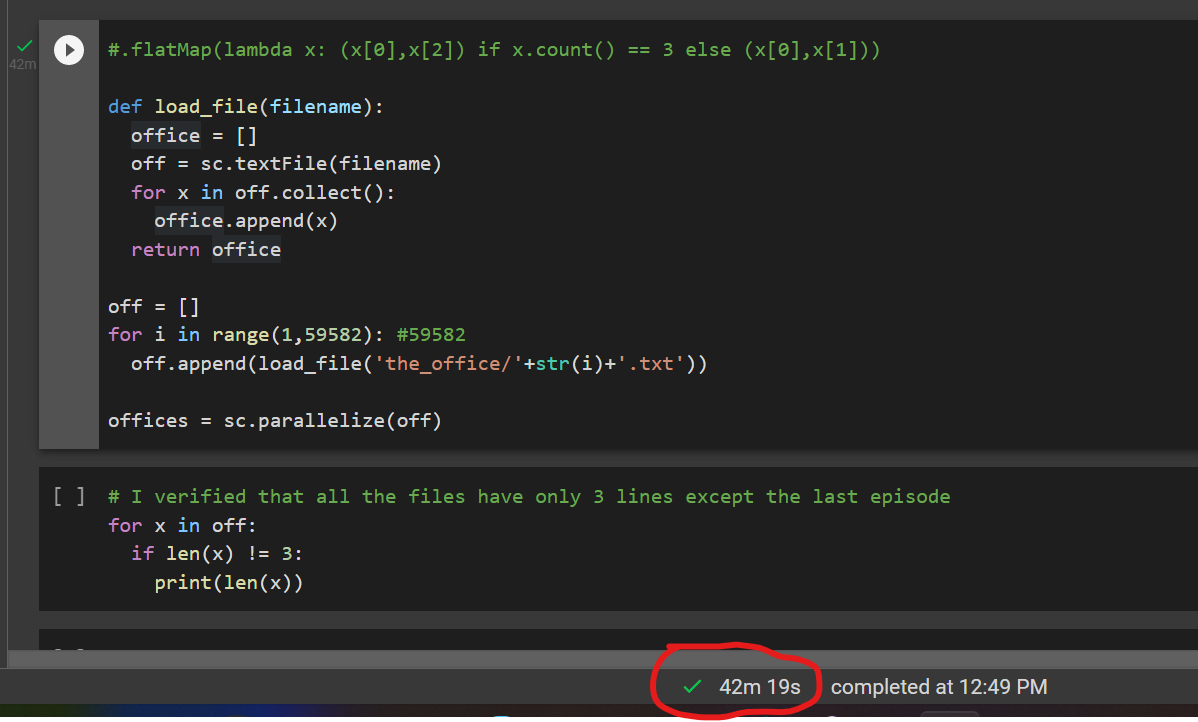